# Data Exploration

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading our dataset
data = pd.read_csv("housing.csv")

In [3]:
#First 10 columns of our data set
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
#Last 10 columns of our dataset
data.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
#General info about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#Check any missing values
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There's 207 missing values for "total_bedrooms"

In [7]:
#Drop all the missing values, and save the csv file
data.dropna(inplace=True)

In [8]:
#Check again for any missing values
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

There are no longer any missing values

In [9]:
#Check existing columns to see what we're working with
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [10]:
#Importing train test split in order to split our data for training and evaluation, it's important to do that
#otherwise we will overfit the model and not get accurate results
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [11]:
#Splitting data for training and testing. 20% of data will be reserved for evaluating
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2 )

In [12]:
train_data = x_train.join(y_train)

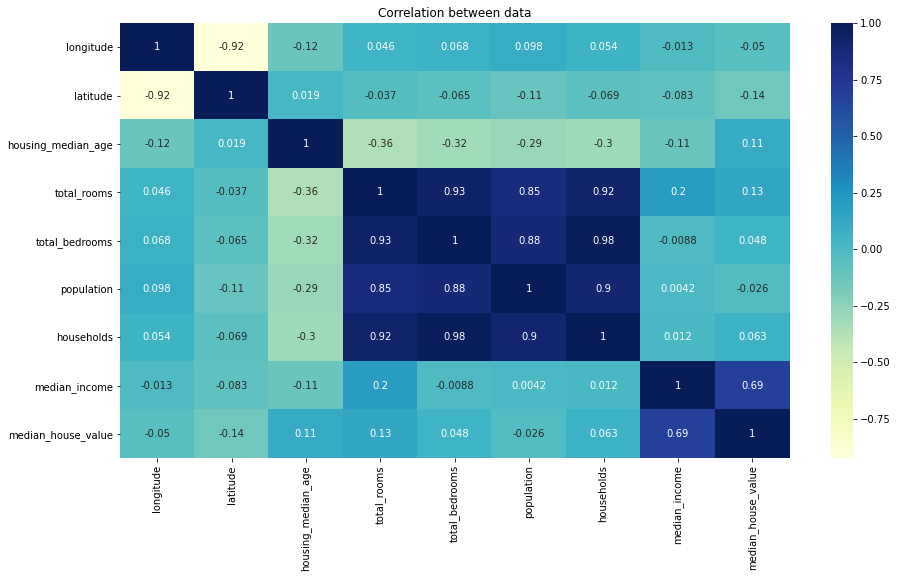

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between data")
plt.show()

We can see that there's a strong correlation between median_house_value and median_income, which will vastly determine the house price. On the contrary, longitude has negative correlation therefore it has no significant impact on housing price.

# Data Pre-Processing

In [14]:
#Leveling out data distribution, replacing 0 values
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

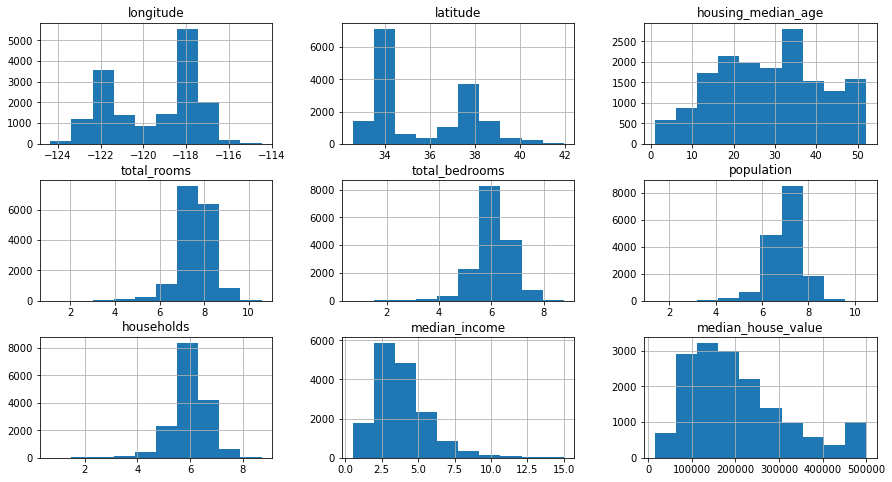

In [15]:
#Data distribution
train_data.hist(figsize=(15,8))
plt.show()

In [16]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [17]:
#Assuming that the ocean_proximity adds value to the house, we will incorporate that data to our training model.
#We will turn ocean_proximity category into multiple features
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5232,-118.24,33.94,42.0,5.942799,4.672829,6.021023,4.615121,0.9705,90000.0,1,0,0,0,0
4176,-118.22,34.10,33.0,7.551712,5.958425,7.080026,5.831882,4.0469,196600.0,1,0,0,0,0
8414,-118.35,33.94,42.0,6.936343,5.631212,7.222566,5.568345,3.3125,144600.0,1,0,0,0,0
12539,-121.49,38.55,52.0,7.830426,6.133398,6.729824,6.093570,3.3844,151100.0,0,1,0,0,0
10386,-117.64,33.61,14.0,8.562740,6.698268,8.020270,6.733402,5.8260,247900.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3443,-118.41,34.25,19.0,5.638355,4.442651,6.182085,4.477337,1.9500,137500.0,1,0,0,0,0
5512,-118.41,34.00,35.0,6.968850,5.723585,6.934397,5.730100,2.7153,265500.0,1,0,0,0,0
4625,-118.32,34.07,25.0,7.916078,6.562444,7.259116,6.499787,3.5909,404500.0,1,0,0,0,0
6216,-117.92,34.06,34.0,7.944492,6.413459,7.449498,6.326149,3.5547,197600.0,1,0,0,0,0


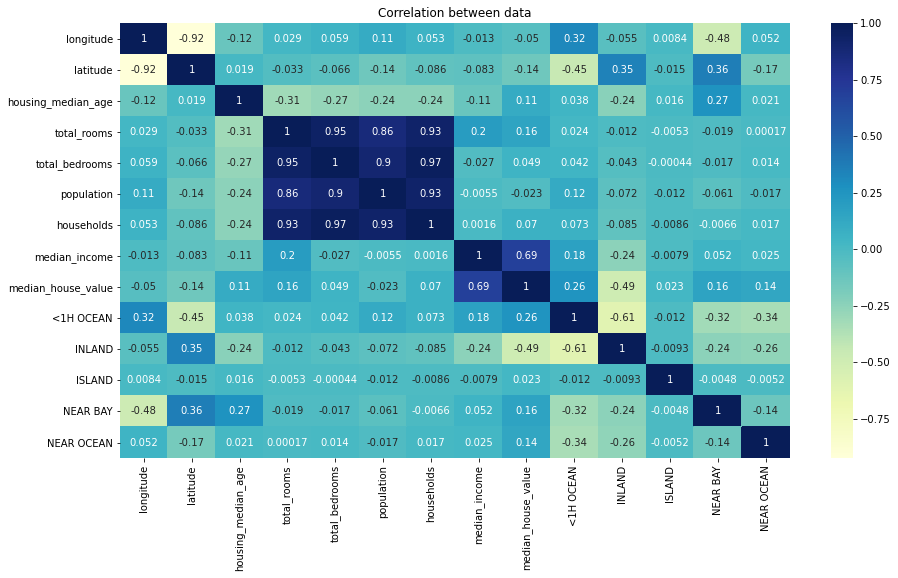

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between data")
plt.show()

With the added features now we can see that the closer the property is to the ocean the higher the price will be, on to contrary, the further away it is from the ocean, the lower the price will fetch. (negative correlation = less value, positive correlation = higher value to property)

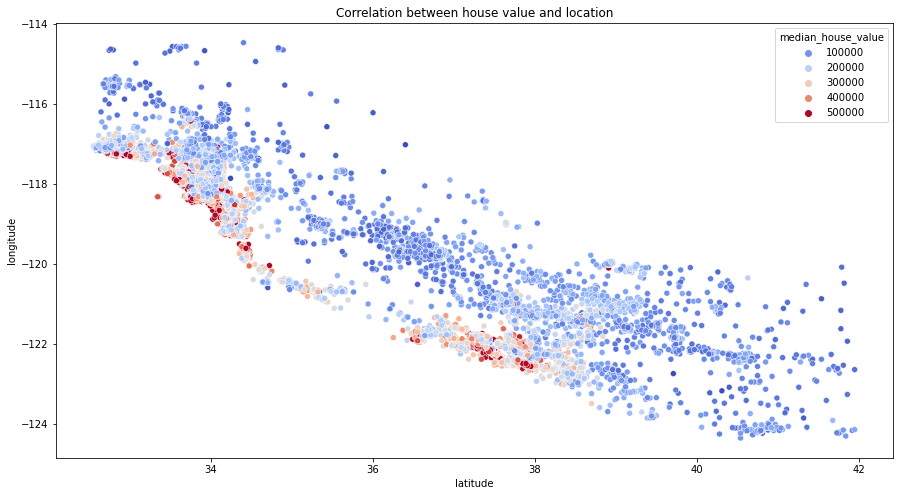

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette ="coolwarm")
plt.title("Correlation between house value and location")
plt.show()

The red dots indicate higher house value because they are closer to the ocean (it's not shown on the map but assume that bottom left white portion is the ocean and the dots are the houses on the land)

In [21]:
#Feature engineering. Check how many of total rooms are actual bedrooms.
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']

#how many rooms per household
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

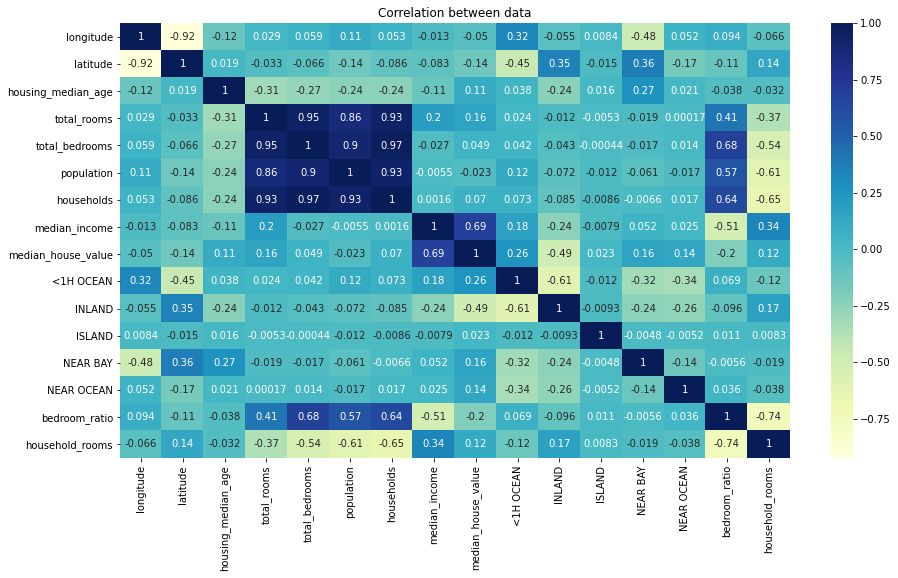

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation between data")
plt.show()

From newly added features we can see that bedroom_ratio has a negative impact on the value of the house, whereas the number of rooms has a positive impact on the value.

# Linear Regression Model

In [23]:
#Importing Linear Regression Model and splitting data
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [24]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [25]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14879,-117.07,32.63,37.0,7.742402,5.940171,6.934397,5.880533,3.4550,156900.0,0,0,0,0,1,0.767226,1.316616
2253,-119.82,36.80,33.0,7.421178,5.549076,6.270988,5.525453,2.9471,99500.0,0,1,0,0,0,0.747735,1.343089
875,-122.03,37.56,24.0,9.041330,7.308543,8.399985,7.307873,4.6978,240300.0,0,0,0,1,0,0.808348,1.237204
18189,-122.02,37.37,8.0,8.645938,7.306531,8.086718,7.192934,4.2782,327700.0,1,0,0,0,0,0.845083,1.202004
5336,-118.46,34.04,17.0,7.912057,6.800170,7.247793,6.632002,3.1235,420800.0,1,0,0,0,0,0.859469,1.193012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7935,-118.08,33.83,30.0,7.691200,6.322565,7.911324,6.265301,2.7759,136800.0,1,0,0,0,0,0.822052,1.227587
13446,-117.43,34.07,18.0,7.805475,6.287859,7.315884,6.216606,2.3768,95300.0,0,1,0,0,0,0.805570,1.255585
333,-122.17,37.74,43.0,6.708084,5.267858,6.204558,5.192957,2.4776,101600.0,0,0,0,1,0,0.785300,1.291766
3511,-118.47,34.26,34.0,7.170888,5.669881,6.478510,5.676754,3.8875,199200.0,1,0,0,0,0,0.790680,1.263202


In [26]:
reg.score(x_test, y_test)

0.6761272220606926

Using Linear Regression the model is only 67.7% accurate in predicting median house prices. This is a fairly low score, however Linear Regression is an easy model to implement.

# Random Forest Model

In [33]:
#Importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [34]:
#Trying random forest regressor model without any tuning
forest.score(x_test, y_test)

0.8139910018069099

Previously from using Linear Regression Model we've only achieved 67.7% accurace, now using Random Forest Model we've increased the accuracy to 81.39%